In [42]:
import spacy
import pandas as pd
import numpy as np
import pickle
import random

In [2]:
nlp = spacy.load("en_core_web_sm")

In [4]:
def read_pickle_file(filename):
    with open(filename, "rb") as f:
        d = pickle.load(f)
    return d


def read_excel(filename):
    df = pd.read_excel(filename)
    return

## 2020-2019 data

In [37]:
paper2020 = read_pickle_file('ICLR data/papers_2020.pkl')
decision2020 = read_pickle_file('ICLR data/paper_decision_dict_2020.pkl')

paper2019 = read_pickle_file('ICLR data/papers_2019.pkl')
decision2019 = read_pickle_file('ICLR data/paper_decision_dict_2019.pkl')

In [40]:
len(decision2020)

2213

In [19]:
doc = nlp(paper2020['Byg-wJSYDS']['content']['abstract'])

In [23]:
adjectives = {}
for tok in doc:
    print(tok.text, tok.pos_, tok.tag_)
    break

In ADP IN


In [32]:
accepted_papers = {}
rejected_papers = {}

acc_count = 0
rej_count = 0

In [34]:
for p in decision2020:
    if decision2020[p]['decision']['content']['decision'].strip().lower().startswith('accept'):
        acc_count += 1
        accepted_papers[decision2020[p]['decision']['forum']] = 1
    elif decision2020[p]['decision']['content']['decision'].strip().lower().startswith('reject'):
        rej_count += 1
        rejected_papers[decision2020[p]['decision']['forum']] = 1
    else:
        print(p)

In [43]:
print("Accepted papers 2020: ", acc_count)
print("Rejected papers 2020: ", rej_count)

rejected_papers = dict(random.sample(rejected_papers.items(), acc_count))

Accepted papers 2020:  687
Rejected papers 2020:  1526


In [44]:
len(rejected_papers)

687

In [46]:
adjectives = {}

for pid in accepted_papers:
    try:
        paper_abs = nlp(paper2020[pid]['content']['abstract'])
        for tok in paper_abs:
            if tok.pos_ == "ADJ":
                if tok.lemma_.strip() in adjectives:
                    adjectives[tok.lemma_.strip()][0] += 1
                else:
                    adjectives[tok.lemma_.strip()] = [1, 0]
    except Exception as ex:
        print(ex)

for pid in rejected_papers:
    try:
        paper_abs = nlp(paper2020[pid]['content']['abstract'])
        for tok in paper_abs:
            if tok.pos_ == "ADJ":
                if tok.lemma_.strip() in adjectives:
                    adjectives[tok.lemma_.strip()][1] += 1
                else:
                    adjectives[tok.lemma_.strip()] = [0, 1]
    except Exception as ex:
        print(ex)

In [47]:
list(adjectives.keys())[0:4]

['unspecific', 'unscalable', 'metric', 'impractical']

In [50]:
adjectives['impractical']

[1, 2]

### 2019 Data

In [58]:
accepted_papers = {}
rejected_papers = {}

acc_count = 0
rej_count = 0

for p in decision2019:
    if decision2019[p]['decision']['content']['recommendation'].strip().lower().startswith('accept'):
        acc_count += 1
        accepted_papers[decision2019[p]['decision']['forum']] = 1
    elif decision2019[p]['decision']['content']['recommendation'].strip().lower().startswith('reject'):
        rej_count += 1
        rejected_papers[decision2019[p]['decision']['forum']] = 1
    else:
        print(p)

In [59]:
print("Accepted papers 2019: ", acc_count)
print("Rejected papers 2019: ", rej_count)

rejected_papers = dict(random.sample(rejected_papers.items(), acc_count))

Accepted papers 2019:  502
Rejected papers 2019:  917


In [65]:
for pid in accepted_papers:
    try:
        paper_abs = nlp(paper2019[pid]['content']['abstract'])
        for tok in paper_abs:
            if tok.pos_ == "ADJ":
                if tok.lemma_.strip() in adjectives:
                    adjectives[tok.lemma_.strip()][0] += 1
                else:
                    adjectives[tok.lemma_.strip()] = [1, 0]
    except Exception as ex:
        print(ex)

for pid in rejected_papers:
    try:
        paper_abs = nlp(paper2019[pid]['content']['abstract'])
        for tok in paper_abs:
            if tok.pos_ == "ADJ":
                if tok.lemma_.strip() in adjectives:
                    adjectives[tok.lemma_.strip()][1] += 1
                else:
                    adjectives[tok.lemma_.strip()] = [0, 1]
    except Exception as ex:
        print(ex)

In [77]:
adjectives['impractical']

[4, 5, 9, 1]

In [70]:
len(adjectives)

2424

In [73]:
for k in adjectives:
    adjectives[k].append(adjectives[k][0]+adjectives[k][1])
    adjectives[k].append(abs(adjectives[k][0]-adjectives[k][1]))

In [80]:
sorted_adj_freq = sorted(adjectives.items(), key=lambda e: e[1][2], reverse=True)
sorted_adj_dist = sorted(adjectives.items(), key=lambda e: e[1][3], reverse=True)

In [81]:
sorted_adj_freq

[('neural', [810, 760, 1570, 50]),
 ('-', [610, 611, 1221, 1]),
 ('deep', [538, 544, 1082, 6]),
 ('such', [529, 488, 1017, 41]),
 ('new', [467, 420, 887, 47]),
 ('adversarial', [383, 377, 760, 6]),
 ('high', [348, 385, 733, 37]),
 ('large', [361, 354, 715, 7]),
 ('different', [304, 342, 646, 38]),
 ('novel', [252, 262, 514, 10]),
 ('many', [233, 232, 465, 1]),
 ('low', [191, 241, 432, 50]),
 ('simple', [221, 205, 426, 16]),
 ('real', [202, 212, 414, 10]),
 ('non', [222, 185, 407, 37]),
 ('other', [181, 222, 403, 41]),
 ('multi', [181, 195, 376, 14]),
 ('generative', [153, 197, 350, 44]),
 ('recent', [168, 180, 348, 12]),
 ('standard', [179, 159, 338, 20]),
 ('good', [163, 172, 335, 9]),
 ('efficient', [193, 139, 332, 54]),
 ('small', [159, 161, 320, 2]),
 ('well', [145, 168, 313, 23]),
 ('natural', [156, 157, 313, 1]),
 ('few', [161, 148, 309, 13]),
 ('several', [144, 159, 303, 15]),
 ('multiple', [159, 129, 288, 30]),
 ('linear', [162, 120, 282, 42]),
 ('convolutional', [132, 149, 281

In [112]:
to_plot_adj = sorted_adj_dist[0:50]
print(to_plot_adj)

[('efficient', [193, 139, 332, 54]), ('complex', [166, 114, 280, 52]), ('neural', [810, 760, 1570, 50]), ('low', [191, 241, 432, 50]), ('empirical', [133, 85, 218, 48]), ('new', [467, 420, 887, 47]), ('generative', [153, 197, 350, 44]), ('robust', [155, 112, 267, 43]), ('linear', [162, 120, 282, 42]), ('other', [181, 222, 403, 41]), ('such', [529, 488, 1017, 41]), ('original', [62, 102, 164, 40]), ('different', [304, 342, 646, 38]), ('non', [222, 185, 407, 37]), ('differentiable', [78, 41, 119, 37]), ('high', [348, 385, 733, 37]), ('similar', [75, 110, 185, 35]), ('structural', [47, 13, 60, 34]), ('particular', [146, 112, 258, 34]), ('dimensional', [96, 130, 226, 34]), ('previous', [154, 121, 275, 33]), ('diverse', [62, 30, 92, 32]), ('easy', [37, 68, 105, 31]), ('agent', [46, 16, 62, 30]), ('multiple', [159, 129, 288, 30]), ('fast', [82, 53, 135, 29]), ('compositional', [37, 9, 46, 28]), ('additional', [54, 80, 134, 26]), ('first', [151, 125, 276, 26]), ('free', [53, 79, 132, 26]), ('

In [107]:
import matplotlib.pyplot as plt

In [108]:
x_axis = [ele[0] for ele in to_plot_adj]
accepted_freq = [ele[1][0] for ele in to_plot_adj]
rejected_freq = [ele[1][1] for ele in to_plot_adj]

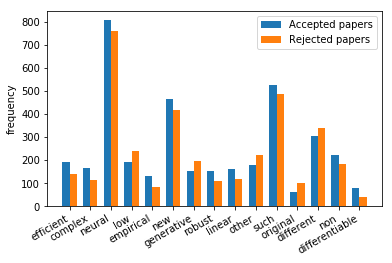

In [111]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


fig, ax = plt.subplots()

x = np.arange(len(x_axis))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, accepted_freq, width, label='Accepted papers')
rects2 = ax.bar(x + width/2, rejected_freq, width, label='Rejected papers')

ax.set_ylabel('frequency')
ax.set_xticks(x)
ax.set_xticklabels(x_axis)
ax.legend()
fig.autofmt_xdate()

# autolabel(rects1)
# autolabel(rects2)

plt.savefig("adj.png")
plt.show()

In [93]:
[('efficient', [193, 139, 332, 54]), ('complex', [166, 114, 280, 52]), ('neural', [810, 760, 1570, 50]), ('low', [191, 241, 432, 50]), ('empirical', [133, 85, 218, 48]), ('new', [467, 420, 887, 47]), ('generative', [153, 197, 350, 44]), ('robust', [155, 112, 267, 43]), ('linear', [162, 120, 282, 42]), ('other', [181, 222, 403, 41]), ('such', [529, 488, 1017, 41]), ('original', [62, 102, 164, 40]), ('different', [304, 342, 646, 38]), ('non', [222, 185, 407, 37]), ('differentiable', [78, 41, 119, 37]), ('high', [348, 385, 733, 37]), ('similar', [75, 110, 185, 35]), ('structural', [47, 13, 60, 34]), ('particular', [146, 112, 258, 34]), ('dimensional', [96, 130, 226, 34]), ('previous', [154, 121, 275, 33]), ('diverse', [62, 30, 92, 32]), ('easy', [37, 68, 105, 31]), ('agent', [46, 16, 62, 30]), ('multiple', [159, 129, 288, 30]), ('fast', [82, 53, 135, 29]), ('compositional', [37, 9, 46, 28]), ('additional', [54, 80, 134, 26]), ('first', [151, 125, 276, 26]), ('free', [53, 79, 132, 26]), ('variable', [44, 18, 62, 26]), ('continuous', [118, 92, 210, 26]), ('physical', [52, 27, 79, 25]), ('hard', [52, 77, 129, 25]), ('single', [124, 147, 271, 23]), ('well', [145, 168, 313, 23]), ('stationary', [36, 13, 49, 23]), ('general', [127, 107, 234, 20]), ('standard', [179, 159, 338, 20]), ('negative', [27, 47, 74, 20]), ('random', [97, 78, 175, 19]), ('geometric', [41, 22, 63, 19]), ('supervised', [72, 91, 163, 19]), ('metric', [30, 48, 78, 18]), ('3d', [54, 36, 90, 18]), ('agnostic', [19, 37, 56, 18]), ('meaningful', [22, 40, 62, 18]), ('inductive', [46, 28, 74, 18]), ('effective', [129, 147, 276, 18]), ('convolutional', [132, 149, 281, 17])]

['efficient',
 'complex',
 'neural',
 'low',
 'empirical',
 'new',
 'generative',
 'robust',
 'linear',
 'other',
 'such',
 'original',
 'different',
 'non',
 'differentiable',
 'high',
 'similar',
 'structural',
 'particular',
 'dimensional',
 'previous',
 'diverse',
 'easy',
 'agent',
 'multiple',
 'fast',
 'compositional',
 'additional',
 'first',
 'free',
 'variable',
 'continuous',
 'physical',
 'hard',
 'single',
 'well',
 'stationary',
 'general',
 'standard',
 'negative',
 'random',
 'geometric',
 'supervised',
 'metric',
 '3d',
 'agnostic',
 'meaningful',
 'inductive',
 'effective',
 'convolutional']

In [115]:
top50adj = sorted_adj_dist[0:55]
topadj = [ele[0] for ele in top50adj]
print(topadj)

['efficient', 'complex', 'neural', 'low', 'empirical', 'new', 'generative', 'robust', 'linear', 'other', 'such', 'original', 'different', 'non', 'differentiable', 'high', 'similar', 'structural', 'particular', 'dimensional', 'previous', 'diverse', 'easy', 'agent', 'multiple', 'fast', 'compositional', 'additional', 'first', 'free', 'variable', 'continuous', 'physical', 'hard', 'single', 'well', 'stationary', 'general', 'standard', 'negative', 'random', 'geometric', 'supervised', 'metric', '3d', 'agnostic', 'meaningful', 'inductive', 'effective', 'convolutional', 'molecular', 'objective', 'noisy', 'sensitive', 'auxiliary']


In [163]:
rev_adj_data = read_pickle_file("ICLR data/review_2019_adj.pickle")

In [164]:
rev_adj_data

{'seq2seq+attn': [0, 1],
 'gyrocentroid': [0, 1],
 'random': [906, 1182],
 'quotient': [2, 1],
 'noisy': [309, 323],
 'computed': [1, 6],
 'phantom': [2, 0],
 'gradient': [2, 0],
 'tenuous': [2, 11],
 'steerable': [7, 6],
 'discuss': [2, 1],
 'supervized': [1, 0],
 'ambitious': [7, 10],
 'hamming': [1, 0],
 'prone': [18, 42],
 'c++': [0, 2],
 'deceptive': [8, 8],
 'eigen': [5, 6],
 'compatible': [27, 20],
 'adjustable': [4, 0],
 'hotpotqa': [1, 0],
 'hasty': [1, 4],
 'sorry': [1, 7],
 'intermediary': [9, 1],
 'goodfellow': [2, 4],
 'annealing': [1, 1],
 'nominative': [1, 0],
 '\\mathcal{l}^1_{l1}$': [0, 1],
 'unrestricted': [37, 21],
 'interatomic': [2, 0],
 'hierarchival': [0, 1],
 'normalizing': [49, 61],
 'prefixed': [2, 0],
 'central': [85, 127],
 'concise': [31, 40],
 '700k': [0, 3],
 'analytical': [36, 38],
 'gendered': [3, 1],
 'constrained': [19, 25],
 'validation': [5, 11],
 'ironic': [1, 0],
 'cartesian': [6, 14],
 'predicate': [18, 2],
 'parallelwavenet': [0, 1],
 'introduce

In [165]:
for k in rev_adj_data:
    rev_adj_data[k].append(rev_adj_data[k][0]+rev_adj_data[k][1])
    rev_adj_data[k].append(abs(rev_adj_data[k][0]-rev_adj_data[k][1]))

In [166]:
rev_sorted_adj_freq = sorted(rev_adj_data.items(), key=lambda e: e[1][2], reverse=True)
rev_sorted_adj_dist = sorted(rev_adj_data.items(), key=lambda e: e[1][3], reverse=True)

In [179]:
rev_sorted_adj_dist.pop(7)

('#', [1752, 982, 2734, 770])

In [180]:
rev_to_plot_adj = rev_sorted_adj_dist[0:15]
print(rev_to_plot_adj)

[('other', [3850, 5062, 8912, 1212]), ('different', [3507, 4670, 8177, 1163]), ('clear', [2482, 3515, 5997, 1033]), ('same', [1804, 2829, 4633, 1025]), ('experimental', [1750, 2686, 4436, 936]), ('hard', [934, 1735, 2669, 801]), ('well', [2339, 3128, 5467, 789]), ('neural', [2407, 3143, 5550, 736]), ('unclear', [713, 1415, 2128, 702]), ('adversarial', [1412, 2076, 3488, 664]), ('main', [2052, 2699, 4751, 647]), ('current', [1024, 1575, 2599, 551]), ('similar', [1496, 2041, 3537, 545]), ('deep', [1551, 2096, 3647, 545]), ('high', [1619, 2150, 3769, 531])]


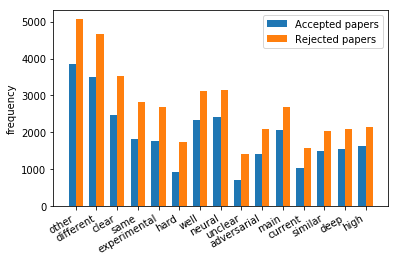

In [181]:
x_axis = [ele[0] for ele in rev_to_plot_adj]
accepted_freq = [ele[1][0] for ele in rev_to_plot_adj]
rejected_freq = [ele[1][1] for ele in rev_to_plot_adj]


fig, ax = plt.subplots()

x = np.arange(len(x_axis))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, accepted_freq, width, label='Accepted papers')
rects2 = ax.bar(x + width/2, rejected_freq, width, label='Rejected papers')

ax.set_ylabel('frequency')
ax.set_xticks(x)
ax.set_xticklabels(x_axis)
ax.legend()
fig.autofmt_xdate()

# autolabel(rects1)
# autolabel(rects2)

plt.savefig("rev_adj.png")
plt.show()